The dot product being bad

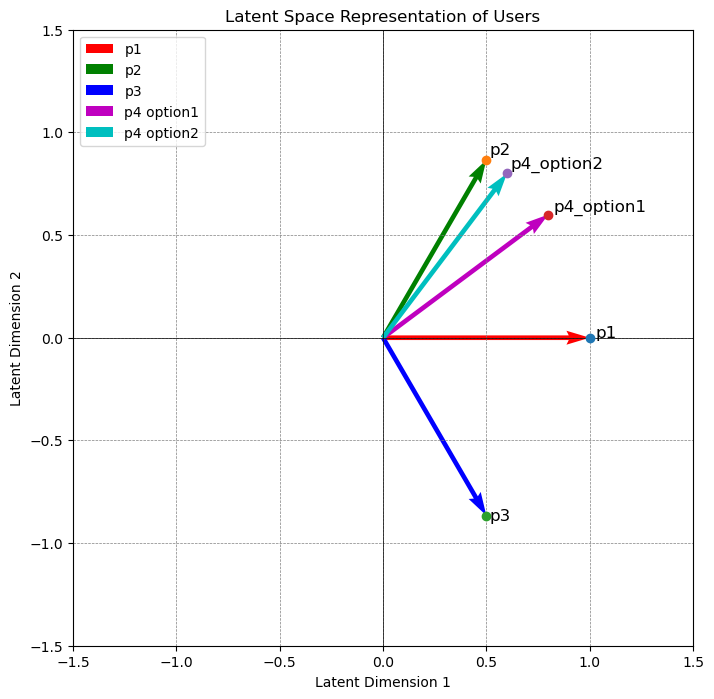

In [288]:
import matplotlib.pyplot as plt
import numpy as np


v1 = np.array([1.0, 1.0, 1.0, 0, 1.0])
v2 = np.array([0, 1.0, 1.0, 0, 0])
v3 = np.array([0, 1.0, 1.0, 1.0, 0])
v4 = np.array([1.0, 0, 1.0, 1.0, 1.0])

# Define user latent vectors
p1 = np.array([1.0, 0.0])
p2 = np.array([0.5, 0.866])  # 60 degrees from p1
p3 = np.array([0.5, -0.866]) # -60 degrees from p1
p4_options = [np.array([0.8, 0.6]), np.array([0.6, 0.8])]  # Two possible positions for p4

# Define the positions for users p1, p2, and p3
users = {'p1': p1, 'p2': p2, 'p3': p3, 'p4_option1': p4_options[0], 'p4_option2': p4_options[1]}

# Plot the users in the latent space
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

for user, pos in users.items():
    plt.plot(pos[0], pos[1], 'o')
    plt.text(pos[0] * (1 + 0.03), pos[1] * (1 + 0.03), user, fontsize=12)

# Plot vectors
plt.quiver(0, 0, p1[0], p1[1], angles='xy', scale_units='xy', scale=1, color='r', label='p1')
plt.quiver(0, 0, p2[0], p2[1], angles='xy', scale_units='xy', scale=1, color='g', label='p2')
plt.quiver(0, 0, p3[0], p3[1], angles='xy', scale_units='xy', scale=1, color='b', label='p3')
plt.quiver(0, 0, p4_options[0][0], p4_options[0][1], angles='xy', scale_units='xy', scale=1, color='m', linestyle='dotted', label='p4 option1')
plt.quiver(0, 0, p4_options[1][0], p4_options[1][1], angles='xy', scale_units='xy', scale=1, color='c', linestyle='dotted', label='p4 option2')

# Set plot limits and labels
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Representation of Users')
plt.legend(loc='upper left')
plt.show()


In [289]:
def cosine_similarity(u, v):
    dot_product = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    return dot_product / (norm_u * norm_v)
def inner_product(u, v):
    return np.dot(u, v)

In [290]:
matrix = np.array([v1, v2, v3, v4])

print(inner_product(v4, v1))
print(inner_product(v4, v2))
print(inner_product(v4, v3))


3.0
1.0
2.0


In [291]:
matrix2 = np.array([[1, 1, 1, 1],[1, 1, 1, 1]])

def vector_to_latent_space(vector, latent_transform = matrix2):
    return latent_transform @ vector


In [292]:
A = np.array([[1, 0, 0, 0, 0],[0, 1, 0, 0, 0]])
A = np.array([[1, 1, 0.5, -1, 0],
              [2, 0, 1, 0, 3]])

print(vector_to_latent_space(v1, A))

print(vector_to_latent_space(v2, A))

print(vector_to_latent_space(v1, A))

[2.5 6. ]
[1.5 1. ]
[2.5 6. ]


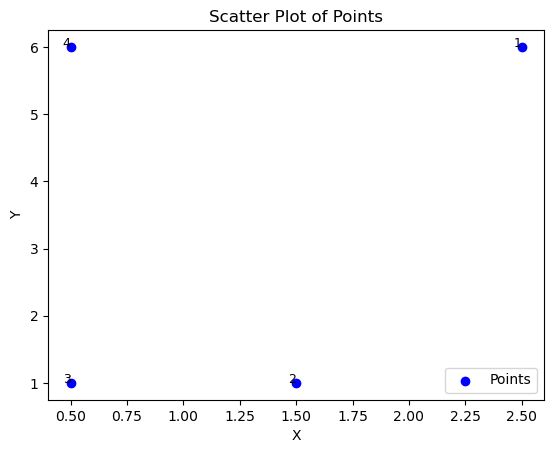

In [293]:


points = []
for vector in matrix:
    points.append(vector_to_latent_space(vector, A))


import matplotlib.pyplot as plt
import numpy as np

# Function to plot points without colors but with labels
def plot_points(point_list):
    # Convert list of arrays to separate x and y values
    x_vals = [point[0] for point in point_list]
    y_vals = [point[1] for point in point_list]
    
    # Create the scatter plot (all points will be the same color)
    plt.scatter(x_vals, y_vals, color='blue', label='Points')

    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of Points')

    # Add numbers next to each point
    for i, (x, y) in enumerate(zip(x_vals, y_vals), start=1):
        plt.text(x, y, str(i), fontsize=9, ha='right', color='black')  # Adjust label position as needed

    # Display the plot with the legend
    plt.legend()
    plt.show()


plot_points(points)


In [294]:
import numpy as np
import matplotlib.pyplot as plt

# Original vectors
v1 = np.array([1.0, 1.0, 1.0, 0, 1.0])
v2 = np.array([0, 1.0, 1.0, 0, 0])
v3 = np.array([0, 1.0, 1.0, 1.0, 0])
v4 = np.array([1.0, 0, 1.0, 1.0, 1.0])


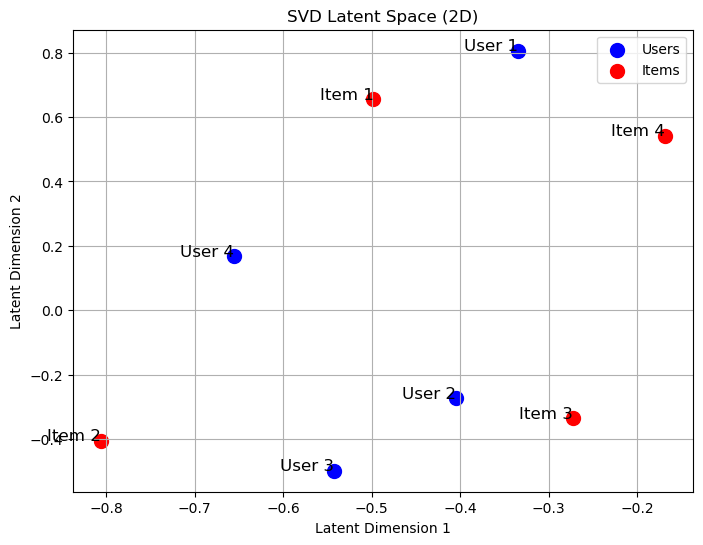

In [295]:
import numpy as np
import matplotlib.pyplot as plt

# Example matrix (user-item ratings matrix)
A = np.array([
    [1, 0, 0, 1],
    [0, 1, 0, 0],
    [0, 1, 1, 0],
    [1, 1, 0, 0]
])

# Step 1: Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Step 2: Reduce to 2 latent dimensions
k = 2  # Number of latent dimensions to keep

# Select the first 2 columns of U (user latent factors)
U_k = U[:, :k]

# Select the first 2 rows of Vt (item latent factors)
Vt_k = Vt[:k, :]

# Step 3: Plot the user and item latent factors
plt.figure(figsize=(8, 6))

# Plot user latent factors
plt.scatter(U_k[:, 0], U_k[:, 1], color='b', label='Users', s=100)

# Plot item latent factors
plt.scatter(Vt_k[0, :], Vt_k[1, :], color='r', label='Items', s=100)

# Label users and items
for i in range(U_k.shape[0]):
    plt.text(U_k[i, 0], U_k[i, 1], f'User {i+1}', fontsize=12, ha='right')

for i in range(Vt_k.shape[1]):
    plt.text(Vt_k[0, i], Vt_k[1, i], f'Item {i+1}', fontsize=12, ha='right')

# Add labels and legend
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('SVD Latent Space (2D)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


KeyError: 'ps2'

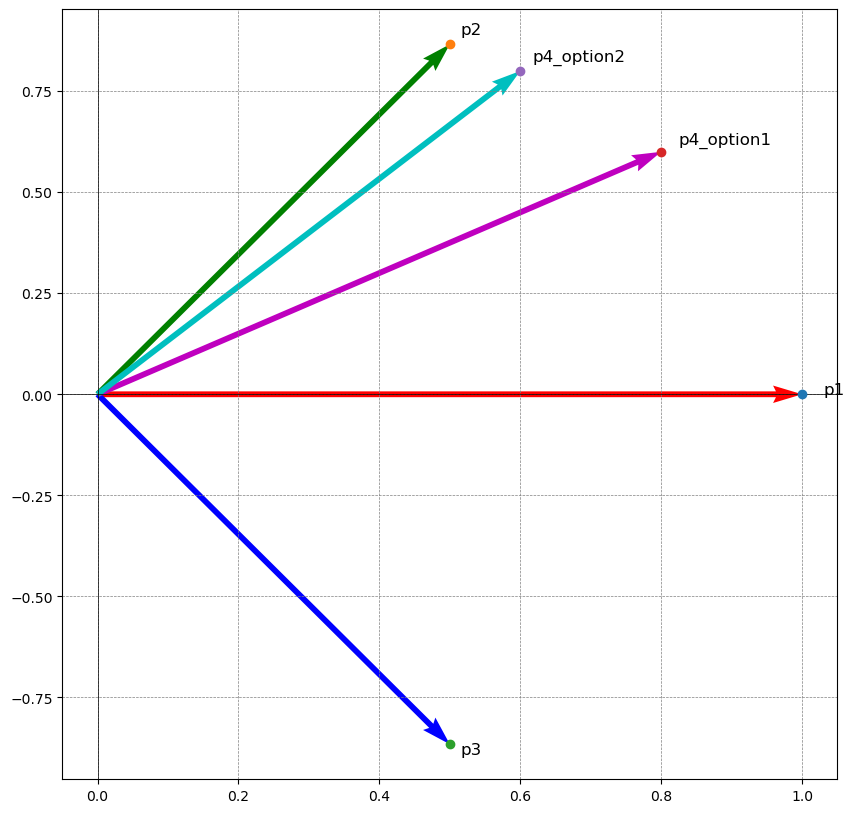

In [296]:
import matplotlib.pyplot as plt
import numpy as np

# Define user-item interactions
user_item_matrix = np.array([
    [1, 1, 1, 0],  # u1
    [0, 1, 1, 0],  # u2
    [0, 1, 1, 1],  # u3
    [1, 0, 1, 1]   # u4 (new user)
])

# Latent space vectors
p1 = np.array([1.0, 0.0])
p2 = np.array([0.5, 0.866])  # 60 degrees from p1
p3 = np.array([0.5, -0.866]) # -60 degrees from p1
p4_options = [np.array([0.8, 0.6]), np.array([0.6, 0.8])]  # Two possible positions for p4

# Define the positions for users p1, p2, p3, and p4
users = {'p1': p1, 'p2': p2, 'p3': p3, 'p4_option1': p4_options[0], 'p4_option2': p4_options[1]}

# Calculate the dot product similarity
def dot_product_similarity(v1, v2):
    return np.dot(v1, v2)

dot_product_similarities = {
    's23': dot_product_similarity(p2, p3),
    's12': dot_product_similarity(p1, p2),
    's13': dot_product_similarity(p1, p3),
    's41_option1': dot_product_similarity(p1, p4_options[0]),
    's43_option1': dot_product_similarity(p3, p4_options[0]),
    's42_option1': dot_product_similarity(p2, p4_options[0]),
    's41_option2': dot_product_similarity(p1, p4_options[1]),
    's43_option2': dot_product_similarity(p3, p4_options[1]),
    's42_option2': dot_product_similarity(p2, p4_options[1])
}

# Plot the users in the latent space
plt.figure(figsize=(10, 10))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

for user, pos in users.items():
    plt.plot(pos[0], pos[1], 'o')
    plt.text(pos[0] * (1 + 0.03), pos[1] * (1 + 0.03), user, fontsize=12)

# Plot vectors
plt.quiver(0, 0, p1[0], p1[1], angles='xy', scale_units='xy', scale=1, color='r', label='p1')
plt.quiver(0, 0, p2[0], p2[1], angles='xy', scale_units='xy', scale=1, color='g', label='p2')
plt.quiver(0, 0, p3[0], p3[1], angles='xy', scale_units='xy', scale=1, color='b', label='p3')
plt.quiver(0, 0, p4_options[0][0], p4_options[0][1], angles='xy', scale_units='xy', scale=1, color='m', linestyle='dotted', label='p4 option1')
plt.quiver(0, 0, p4_options[1][0], p4_options[1][1], angles='xy', scale_units='xy', scale=1, color='c', linestyle='dotted', label='p4 option2')

# Display the dot product similarities on the plot for p4 options
for (key, sim) in dot_product_similarities.items():
    u1, u2 = key.split('_option')[0][:2], key.split('_option')[0][2:]
    pos1 = users[f'p{u1}']
    pos2 = p4_options[0] if '_option1' in key else p4_options[1]
    midpoint = (pos1 + pos2) / 2
    plt.text(midpoint[0], midpoint[1], f"{sim:.2f}", fontsize=10, color='purple')

# Set plot limits and labels
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Representation of Users using Dot Product')
plt.legend(loc='upper left')
plt.show()


KeyError: 'p23'

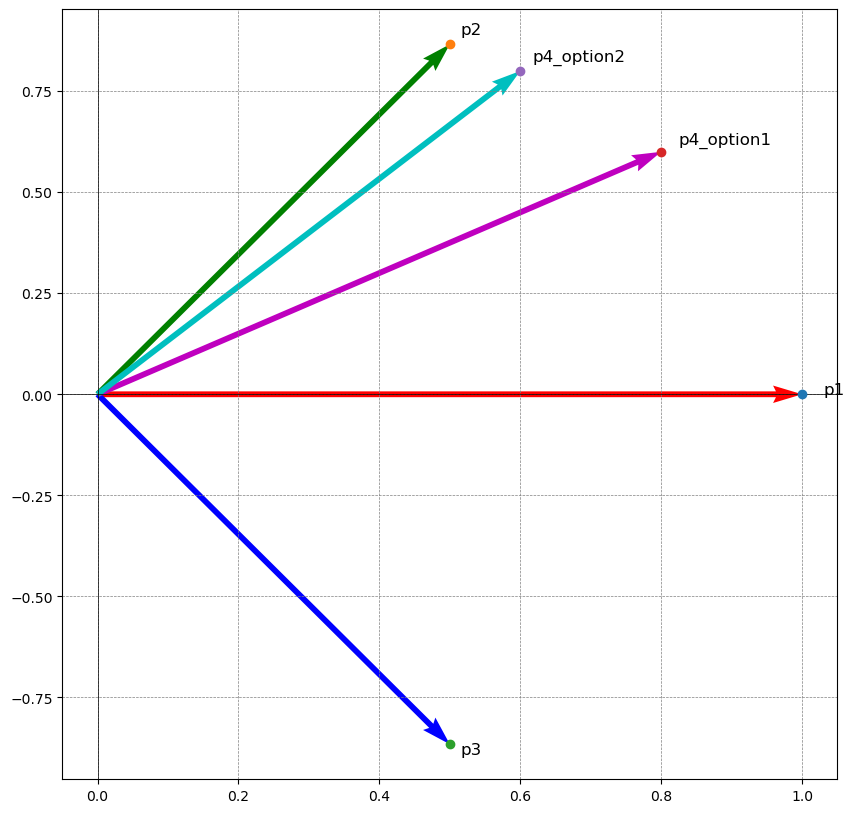

In [297]:
import matplotlib.pyplot as plt
import numpy as np

# Define user-item interactions
user_item_matrix = np.array([
    [1, 1, 1, 0],  # u1
    [0, 1, 1, 0],  # u2
    [0, 1, 1, 1],  # u3
    [1, 0, 1, 1]   # u4 (new user)
])

# True similarity measures using Jaccard coefficient
similarities = {
    's23': 0.66,
    's12': 0.5,
    's13': 0.4,
    's41': 0.6,
    's43': 0.4,
    's42': 0.2
}

# Latent space vectors
p1 = np.array([1.0, 0.0])
p2 = np.array([0.5, 0.866])  # 60 degrees from p1
p3 = np.array([0.5, -0.866]) # -60 degrees from p1
p4_options = [np.array([0.8, 0.6]), np.array([0.6, 0.8])]  # Two possible positions for p4

# Define the positions for users p1, p2, p3, and p4
users = {'p1': p1, 'p2': p2, 'p3': p3, 'p4_option1': p4_options[0], 'p4_option2': p4_options[1]}

# Calculate the cosine similarity (inner product)
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

cosine_similarities = {
    's23': cosine_similarity(p2, p3),
    's12': cosine_similarity(p1, p2),
    's13': cosine_similarity(p1, p3),
    's41_option1': cosine_similarity(p1, p4_options[0]),
    's43_option1': cosine_similarity(p3, p4_options[0]),
    's42_option1': cosine_similarity(p2, p4_options[0]),
    's41_option2': cosine_similarity(p1, p4_options[1]),
    's43_option2': cosine_similarity(p3, p4_options[1]),
    's42_option2': cosine_similarity(p2, p4_options[1])
}

# Plot the users in the latent space
plt.figure(figsize=(10, 10))
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

for user, pos in users.items():
    plt.plot(pos[0], pos[1], 'o')
    plt.text(pos[0] * (1 + 0.03), pos[1] * (1 + 0.03), user, fontsize=12)

# Plot vectors
plt.quiver(0, 0, p1[0], p1[1], angles='xy', scale_units='xy', scale=1, color='r', label='p1')
plt.quiver(0, 0, p2[0], p2[1], angles='xy', scale_units='xy', scale=1, color='g', label='p2')
plt.quiver(0, 0, p3[0], p3[1], angles='xy', scale_units='xy', scale=1, color='b', label='p3')
plt.quiver(0, 0, p4_options[0][0], p4_options[0][1], angles='xy', scale_units='xy', scale=1, color='m', linestyle='dotted', label='p4 option1')
plt.quiver(0, 0, p4_options[1][0], p4_options[1][1], angles='xy', scale_units='xy', scale=1, color='c', linestyle='dotted', label='p4 option2')

# Display the cosine similarities on the plot for p4 options
for (key, sim) in cosine_similarities.items():
    u1, u2 = key[1:3], key[3:5]  # Extract the proper user identifiers
    pos1 = users[f'p{u1}']
    pos2 = p4_options[0] if '_option1' in key else p4_options[1]
    midpoint = (pos1 + pos2) / 2
    plt.text(midpoint[0], midpoint[1], f"{sim:.2f}", fontsize=10, color='purple')


# Set plot limits and labels
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Representation of Users')
plt.legend(loc='upper left')
plt.show()


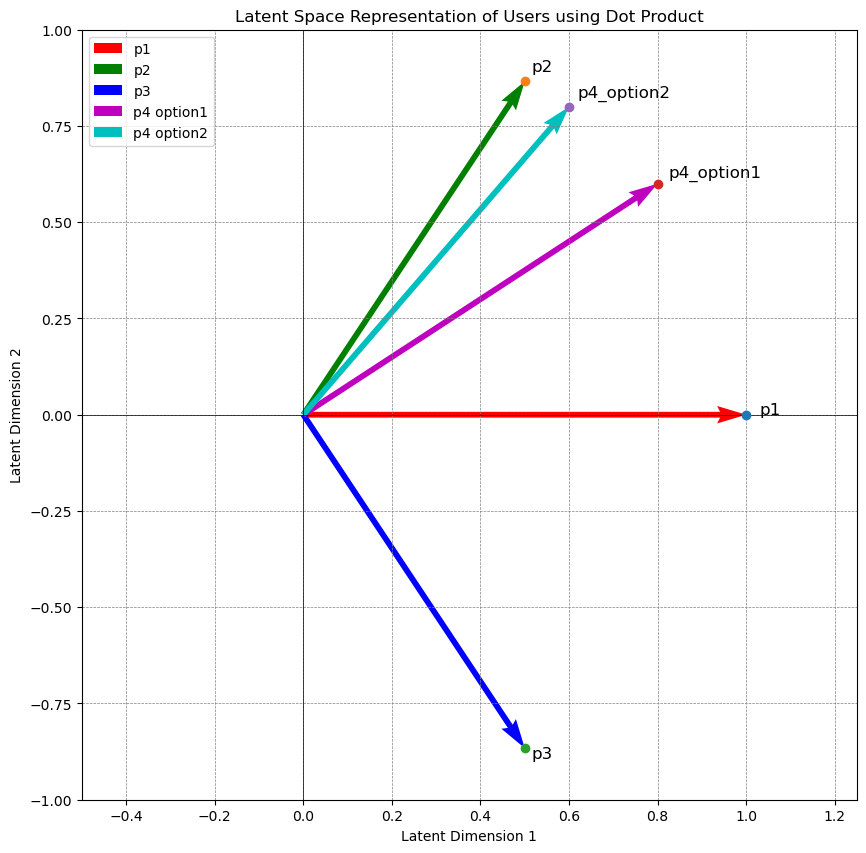

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define user-item interactions
user_item_matrix = np.array([
    [1, 1, 1, 0, 1],  # u1
    [0, 1, 1, 0, 0],  # u2
    [0, 1, 1, 1, 0],  # u3
    [1, 0, 1, 1, 1]   # u4 (new user)
])

# Latent space vectors
p1 = np.array([1.0, 0.0])
p2 = np.array([0.5, 0.866])  # 60 degrees from p1
p3 = np.array([0.5, -0.866]) # -60 degrees from p1
p4_options = [np.array([0.8, 0.6]), np.array([0.6, 0.8])]  # Two possible positions for p4

# Define the positions for users p1, p2, p3, and p4
users = {'p1': p1, 'p2': p2, 'p3': p3, 'p4_option1': p4_options[0], 'p4_option2': p4_options[1]}

# Calculate the dot product similarity
def dot_product_similarity(v1, v2):
    return np.dot(v1, v2)

dot_product_similarities = {
    's23': dot_product_similarity(p2, p3),
    's12': dot_product_similarity(p1, p2),
    's13': dot_product_similarity(p1, p3),
    's41_option1': dot_product_similarity(p1, p4_options[0]),
    's43_option1': dot_product_similarity(p3, p4_options[0]),
    's42_option1': dot_product_similarity(p2, p4_options[0]),
    's41_option2': dot_product_similarity(p1, p4_options[1]),
    's43_option2': dot_product_similarity(p3, p4_options[1]),
    's42_option2': dot_product_similarity(p2, p4_options[1])
}

# Plot the users in the latent space
plt.figure(figsize=(10, 10))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

for user, pos in users.items():
    plt.plot(pos[0], pos[1], 'o')
    plt.text(pos[0] * (1 + 0.03), pos[1] * (1 + 0.03), user, fontsize=12)

# Plot vectors
plt.quiver(0, 0, p1[0], p1[1], angles='xy', scale_units='xy', scale=1, color='r', label='p1')
plt.quiver(0, 0, p2[0], p2[1], angles='xy', scale_units='xy', scale=1, color='g', label='p2')
plt.quiver(0, 0, p3[0], p3[1], angles='xy', scale_units='xy', scale=1, color='b', label='p3')
plt.quiver(0, 0, p4_options[0][0], p4_options[0][1], angles='xy', scale_units='xy', scale=1, color='m', linestyle='dotted', label='p4 option1')
plt.quiver(0, 0, p4_options[1][0], p4_options[1][1], angles='xy', scale_units='xy', scale=1, color='c', linestyle='dotted', label='p4 option2')

# Display the dot product similarities on the plot for p4 options
for (key, sim) in dot_product_similarities.items():
    try:
        u1, u2 = key[1:3], key[3:5]  # Extract the proper user identifiers
        pos1 = users[f'p{u1}']
        pos2 = p4_options[0] if '_option1' in key else p4_options[1]
        midpoint = (pos1 + pos2) / 2
        plt.text(midpoint[0], midpoint[1], f"{sim:.2f}", fontsize=10, color='purple')
    except KeyError:
        continue

# Set plot limits and labels
plt.xlim(-0.5, 1.25)
plt.ylim(-1, 1)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Representation of Users using Dot Product')
plt.legend(loc='upper left')
plt.show()


The matrix is used to show the user similarity in the original data.
The dot product is used to compute similiartity. With v4 being most similar to v1. Then second most similar is v3 and finally v2. 
However as you can see in the graph there is no where to correcly put 
Then the ranking in the lantent space is how the model internally ranks and represents the different parts of the materix. 